In [1]:

# https://blog.keras.io/building-autoencoders-in-keras.html

# from google.colab import drive
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import pickle

from pathlib import Path

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
print(tf.version.VERSION)

#import keras
%matplotlib inline



# drive.mount("/content/gdrive")

#home_path='/content/gdrive/My Drive/w251/Final_project/20200328/'
# home_path='/content/gdrive/My Drive/w251/Final_project/20200403/'

## Select tensor input

data_path = '/workspace/full_data.npy'

# ## Select weight for knowledge transfer
label_path = '/workspace/full_labels.npy'




1.13.1


Using TensorFlow backend.


In [2]:
def npy_load_data(data_path):
  imgPath = Path(data_path)
  sampleData = []
  with imgPath.open('rb') as f:
    
    fsz = os.fstat(f.fileno()).st_size
#     print(fsz)
    out = np.load(f)
    sampleData.append(out)
    while f.tell() < 15000000000:
        sampleData.append(np.load(f))
  sampleData = np.asarray(sampleData)
  print(sampleData.shape) 
  return sampleData

def npy_load_label(data_path):
  imgPath = Path(data_path)
  sampleData = []
  with imgPath.open('rb') as f:
    
    fsz = os.fstat(f.fileno()).st_size
#     print(fsz)
    out = np.load(f)
    sampleData.append(out)
    while f.tell() < fsz:
        sampleData.append(np.load(f))
  sampleData = np.asarray(sampleData)
  print(sampleData.shape) 
  return sampleData

In [3]:
data_train=npy_load_data(data_path)
data_label=npy_load_label(label_path)

data_label_sub = data_label[0:data_train.shape[0]]
data_label_sub.shape

# data_train=np.load('full_data.npy')
# data_label=np.load('full_labels.npy')
# data_label

(12330, 176, 192, 9)
(30467,)


(12330,)

In [4]:
data_label_sub.shape
data_train.shape

(12330, 176, 192, 9)

In [5]:
data_train=data_train.astype('float32')
data_label_sub = data_label_sub.astype('float32')
data_label_sub_biased=np.log(data_label_sub+30)*20

Text(0, 0.5, 'Frequency')

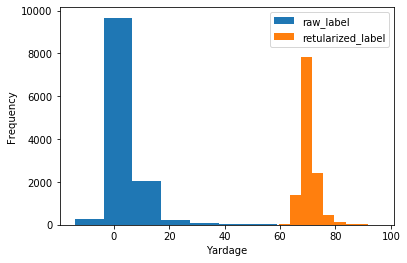

In [22]:
plt.hist(data_label_sub)
plt.hist(data_label_sub_biased)

plt.legend(['raw_label', 'retularized_label'])
plt.xlabel('Yardage')
plt.ylabel('Frequency')

## Split train and test data

In [7]:
data_train_in_norm=tf.keras.utils.normalize(data_train, axis = 3)

In [8]:
from sklearn.model_selection import train_test_split
# Train data normalization
xTrain, xTest, yTrain, yTest = train_test_split(data_train_in_norm, data_label_sub_biased, test_size = 0.4, random_state = 123)


In [9]:
yTest[0:10]

array([69.93015 , 68.67974 , 71.106964, 71.67038 , 68.02395 , 69.31472 ,
       69.93015 , 68.67974 , 66.64409 , 68.02395 ], dtype=float32)

## Data standarization

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
/workspace/checkpoint
Train on 7398 samples, validate on 4932 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
7398/7398 [==============================] - 107s 14ms/sample - loss: 142073.1813 - val_loss: 15.0618
Epoch 2/100
7398/7398 [==============================] - 34s 5ms/sample - loss: 17.0462 - val_loss: 36.5482
Epoch 3/100
7398/7398 [==============================] - 35s 5ms/sample - loss: 16.0881 - val_loss: 19.8980
Epoch 4/100
7398/7398 [==============================] - 34s 5ms/sample - loss: 18.8531 - val_loss: 20.1893
Epoch 5/100
7380/7398 [============================>.] - ETA: 0s - loss: 19.6005
Epoch 00005: loss improved from inf to 19.58270, saving model to /workspace/checkpoint/cp-nfl-0005.ckpt
7398/7398 [==============================] - 37s 5ms/sample - loss: 19.5827 - val_loss: 15.6562
Epoch 6/100
7398/7398 [====================

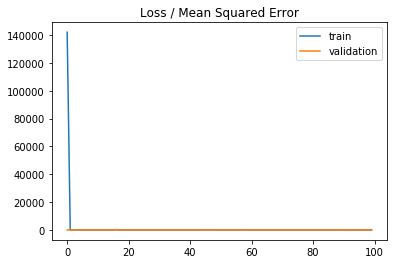

In [10]:
# Reference: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.regularizers import l1,l2

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

batch_L =30
epoch_L =100

model = Sequential()
'''
model.add(Conv2D(32, (64, 64), kernel_regularizer=l2(0.01), activation='relu', input_shape=(176, 192, 9), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (16, 16), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (8, 8), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (4, 4), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
'''


'''
model.add( Conv2D(16, (32, 32), kernel_regularizer=l2(0.01), activation='relu', input_shape=(176, 192, 9), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))

model.add(Conv2D(32, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (16, 16), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (8, 8), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='linear'))
'''

'''
model.add( Conv2D(16, (64, 64), kernel_regularizer=l2(0.01), activation='relu', input_shape=(176, 192, 9), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))

model.add(Conv2D(32, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))

model.add(Conv2D(32, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (16, 16), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (8, 8), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
'''

model.add( Conv2D(32, (64, 64), kernel_regularizer=l2(0.01), activation='relu', input_shape=(176, 192, 9), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))

model.add(Conv2D(64, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))

model.add(Conv2D(128, (32, 32), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (16, 16), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (8, 8), kernel_regularizer=l2(0.01), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#model.add(Dense(1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='linear'))
model.add(Dense(1, kernel_regularizer=l2(0.01), activation='linear'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001)

model.compile(loss='mean_squared_error', optimizer=adam)

# checkpoint
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = '/workspace/checkpoint/cp-nfl-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=5)

# Loads the weights
#initial_weight_path = '/workspace/checkpoint/cp-nfl-0100-l2-100epoch.ckpt'
initial_weight_path = '/workspace/checkpoint/cp-nfl-0025_l2_before_overfit_85epoch.ckpt'
#model.load_weights(initial_weight_path)


# history = model.fit(xTrain, yTrain, batch_size=batch_L, epochs=epoch_L)
history = model.fit(xTrain, yTrain, batch_size=batch_L, epochs=epoch_L, 
                    callbacks=[checkpoint], validation_data=(xTest, yTest))
 

train_mse = model.evaluate(xTrain, yTrain, batch_size=batch_L)
test_mse = model.evaluate(xTest, yTest, batch_size=batch_L)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')




plt.legend()
plt.show()


In [11]:
# Loads the weights
initial_weight_path = '/workspace/checkpoint/cp-nfl-0025_l2_before_overfit_85epoch.ckpt'
#'cp-nfl-0025_l2_before_overfit_85epoch.ckp'
model.load_weights(initial_weight_path)

In [12]:
trainloss=history.history['loss']
valloss=history.history['val_loss']


Text(0, 0.5, 'loss/Mean Squared Error')

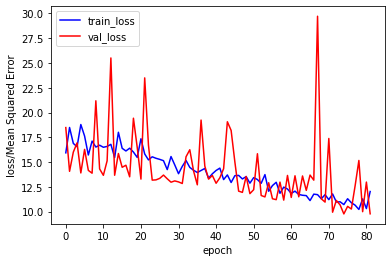

In [21]:
train_loss,=plt.plot(trainloss[18:],'b', label='train_loss')
val_loss,=plt.plot(valloss[18:],'r', label='val_loss')
plt.legend(handles=[train_loss, val_loss])
plt.xlabel('epoch')
plt.ylabel('loss/Mean Squared Error')

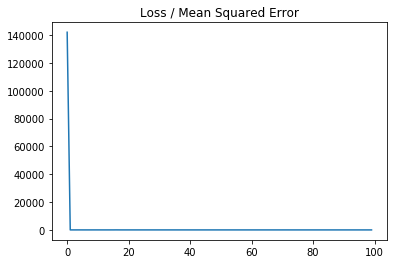

In [14]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')


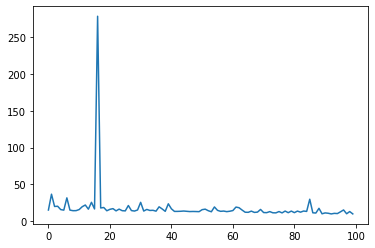

In [15]:
plt.plot(history.history['val_loss'], label='validation')

In [16]:
range_monitor = range(200,300)
ynew = model.predict(xTest[range_monitor])

ynew_rescale=np.exp(ynew/20) -30
yTest_rescale=np.exp(yTest/20) -30

np.log(data_label_sub+30)*20


array([72.751724, 69.93015 , 71.106964, ..., 71.67038 , 70.52721 ,
       70.52721 ], dtype=float32)

Text(0, 0.5, 'yardage')

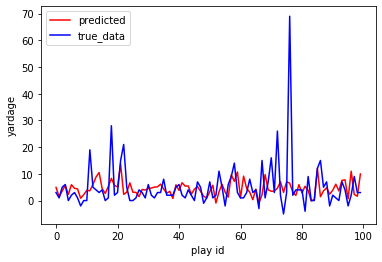

In [17]:
predicted,=plt.plot(ynew_rescale,'r', label='predicted')
true_data,=plt.plot(yTest_rescale[range_monitor],'b', label='true_data')
plt.legend(handles=[predicted, true_data])
plt.xlabel('play id')
plt.ylabel('yardage')



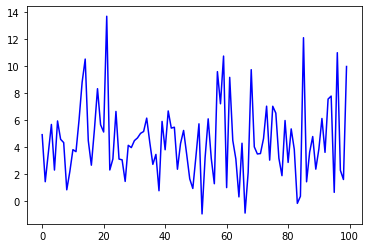

In [18]:
plt.plot(ynew_rescale[0:len(range_monitor)],'b')

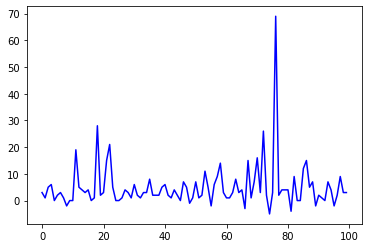

In [19]:
plt.plot(yTest_rescale[range_monitor],'b')

In [20]:
# Loads the weights
#checkpoint_path = '/workspace/cp-nfl-0100.ckpt'
#model.load_weights(checkpoint_path)